# Importing Libraries and Read of Train File

In [724]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [725]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [726]:
df.shape

(891, 12)

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Sumary Statistics

In [728]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

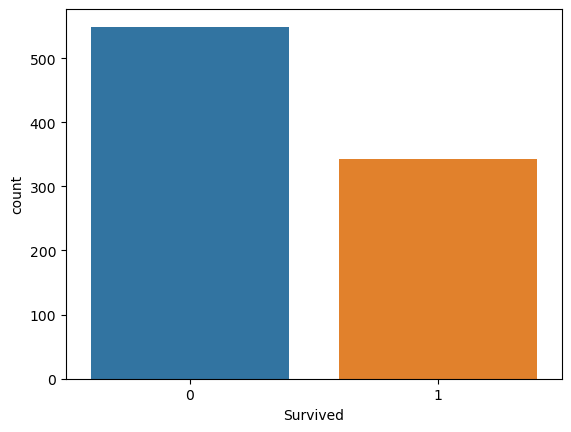

In [729]:
sns.countplot(data=df,x='Survived')

In [730]:
df.Survived.value_counts(normalize=True).reset_index()

,index,Survived
0,0,0.616162
1,1,0.383838


# Data Cleaning

## Handling Nulls

In [731]:
100*df.isna().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

*Age* and *Embarked* are necessary to address. Cabin and ticket are going to be removed as are not relevant for the analysis. 

In [732]:
df.drop(columns={'Cabin','Ticket','Name','PassengerId'},inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [733]:
df['Age'].fillna(df.Age.median(skipna=True),inplace=True)

<Axes: xlabel='Embarked', ylabel='count'>

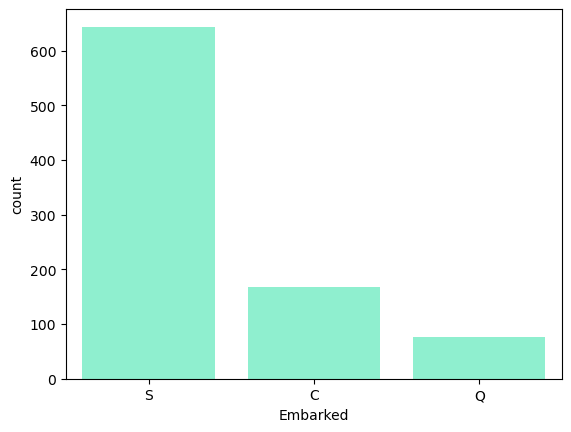

In [734]:
sns.countplot(data=df,x='Embarked',color='aquamarine')

In [735]:
fare_median=df.Fare.median()
fare_median

14.4542

In [736]:
df['Embarked'].fillna("S",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [737]:
labels=['0-12','13-18','19-35','36-60','61-80']
Childhood=12
Teenage=18
Young_Adults=35
Middle_Aged_Adults=60
Seniors=df.Age.max()
bins=[0,Childhood,Teenage,Young_Adults,Middle_Aged_Adults,Seniors]

df['Age_Group']=pd.cut(
        df['Age'],
        labels=labels,
        bins=bins
)

In [738]:
df.groupby("Age_Group").agg({"Age":["min","max"]})

Age      
             min   max
Age_Group             
0-12        0.42  12.0
13-18      13.00  18.0
19-35      19.00  35.0
36-60      36.00  60.0
61-80      61.00  80.0

<Axes: xlabel='Age_Group', ylabel='count'>

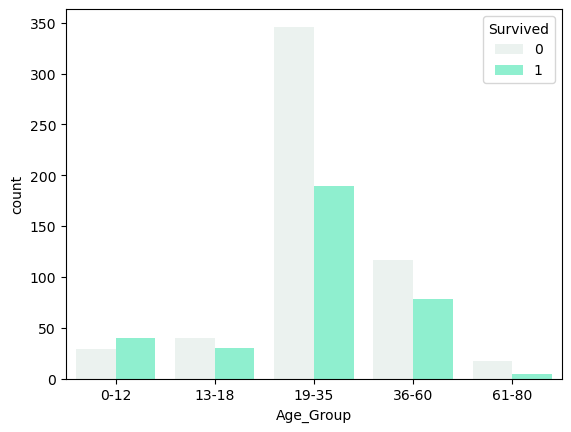

In [739]:
sns.countplot(
    data=df,
    x='Age_Group',
    hue="Survived",
    color='aquamarine'
)

<Axes: xlabel='Embarked', ylabel='count'>

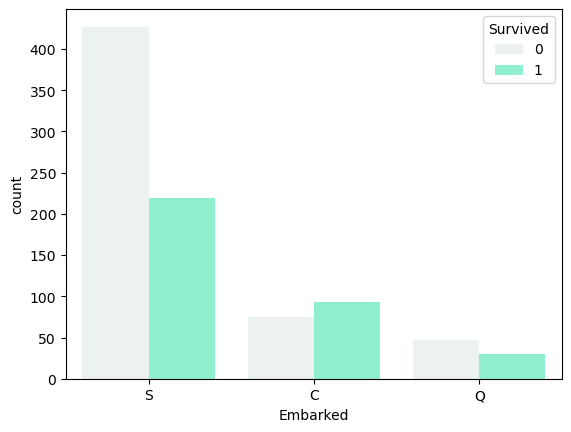

In [740]:
sns.countplot(
    data=df,
    x='Embarked',
    hue='Survived',
    color='aquamarine'
    )

C:\Users\edwin\AppData\Local\Temp\ipykernel_36352\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

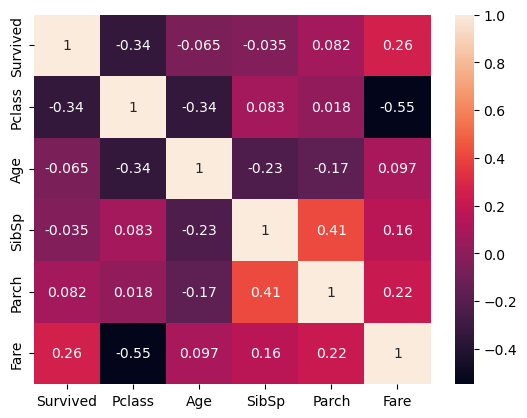

In [741]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Fare', ylabel='Count'>

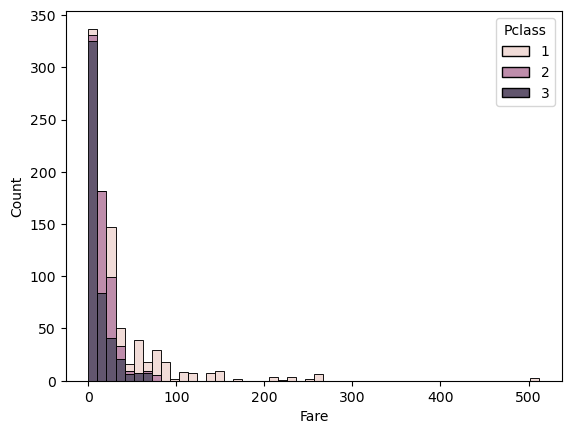

In [742]:
sns.histplot(
    data=df,
    x='Fare',
    multiple='stack',
    hue='Pclass',
    bins=50
            )

In [743]:
df_class1=df[df["Pclass"]==1]
min_fare=df_class1.Fare.min()
q_25=df_class1.Fare.quantile(0.25)
q_50=df_class1.Fare.quantile(0.5)
q_75=df_class1.Fare.quantile(0.75)
max_fare=df_class1.Fare.max()
iqr=q_75-q_25
upper=q_75+(1.5*iqr)
lower=q_25-(1.5*iqr)

In [744]:
list_outliers=[]

for i in df["Pclass"].unique():
    df_class=df[df["Pclass"]==i]
    min_fare=df_class.Fare.min()
    q_25=df_class.Fare.quantile(0.25)
    q_50=df_class.Fare.quantile(0.5)
    q_75=df_class.Fare.quantile(0.75)
    max_fare=df_class.Fare.max()
    iqr=q_75-q_25
    upper=q_75+(1.5*iqr)
    lower=q_25-(1.5*iqr)

    print(min_fare,lower,q_25,q_50,q_75,upper,max_fare)

    index_toremove=list(df_class[(df_class['Fare']<lower)|(df_class['Fare']>upper)].index)

    list_outliers.append(index_toremove)
    
list_outliers_unique=[item for sublist in list_outliers for item in sublist]

0.0 -3.875 7.75 8.05 15.5 27.125 69.55
0.0 -62.940125 30.923949999999998 60.287499999999994 93.5 187.364075 512.3292
0.0 -6.5 13.0 14.25 26.0 45.5 73.5


In [745]:
df_woutliers=df[~df.index.isin(list_outliers_unique)]
df_woutliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,0,3,male,22.0,1,0,7.2500,S,19-35
1,1,1,female,38.0,1,0,71.2833,C,36-60
2,1,3,female,26.0,0,0,7.9250,S,19-35
3,1,1,female,35.0,1,0,53.1000,S,19-35
4,0,3,male,35.0,0,0,8.0500,S,19-35


In [746]:
df_woutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   812 non-null    int64   
 1   Pclass     812 non-null    int64   
 2   Sex        812 non-null    object  
 3   Age        812 non-null    float64 
 4   SibSp      812 non-null    int64   
 5   Parch      812 non-null    int64   
 6   Fare       812 non-null    float64 
 7   Embarked   812 non-null    object  
 8   Age_Group  812 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 58.1+ KB


In [747]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Solo aplicar a las columnas numéricas
numerical_cols = ['Age','Fare']
df_woutliers[numerical_cols] = scaler.fit_transform(df_woutliers[numerical_cols])

C:\Users\edwin\AppData\Local\Temp\ipykernel_36352\3547646887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woutliers[numerical_cols] = scaler.fit_transform(df_woutliers[numerical_cols])


In [748]:
# Convertir 'Sex' y 'Embarked' en variables dummies
final_df = pd.get_dummies(df_woutliers, columns=['Sex', 'Embarked', 'Age_Group','Pclass'])
final_df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_0-12,Age_Group_13-18,Age_Group_19-35,Age_Group_36-60,Age_Group_61-80,Pclass_1,Pclass_2,Pclass_3
0,0,-0.628056,1,0,-0.604729,0,1,0,0,1,0,0,1,0,0,0,0,1
1,1,0.629184,1,0,1.559801,1,0,1,0,0,0,0,0,1,0,1,0,0
2,1,-0.313746,0,0,-0.581912,1,0,0,0,1,0,0,1,0,0,0,0,1
3,1,0.393452,1,0,0.945147,1,0,0,0,1,0,0,1,0,0,1,0,0
4,0,0.393452,0,0,-0.577686,0,1,0,0,1,0,0,1,0,0,0,0,1


<Axes: >

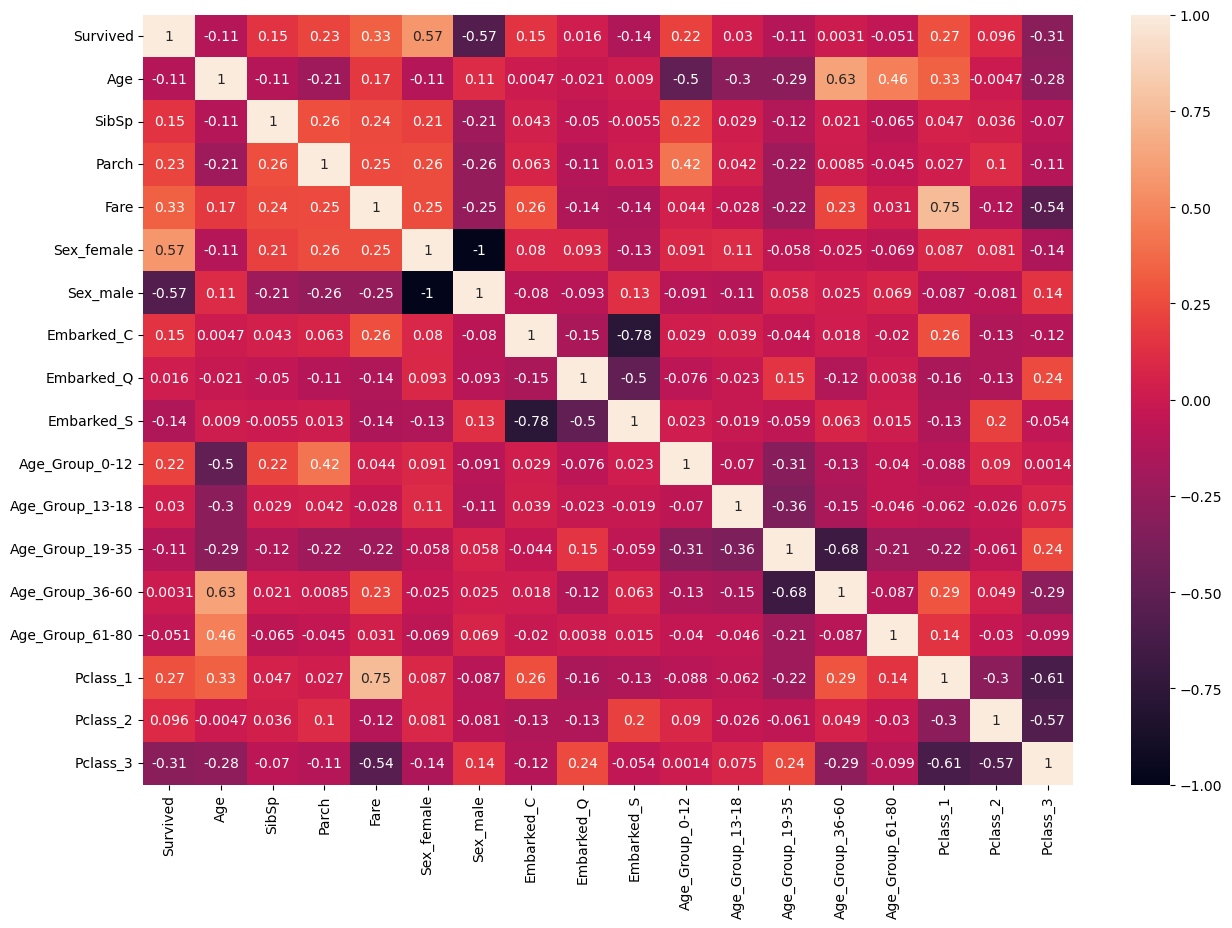

In [749]:
# Cambiar tamaño de la figura
plt.figure(figsize=(15, 10))
sns.heatmap(final_df.corr(),annot=True)

In [750]:
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']

In [751]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [752]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train, y_train)

LogisticRegression()

In [753]:
# Realizar predicciones
y_pred = logreg.predict(X_test)

In [754]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 90.16%


In [755]:
# Matriz de confusión
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[69  8]
 [ 4 41]]


In [756]:
# Reporte de clasificación
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        77
           1       0.84      0.91      0.87        45

    accuracy                           0.90       122
   macro avg       0.89      0.90      0.90       122
weighted avg       0.91      0.90      0.90       122



# Decision Tree

In [757]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [758]:
# Predecir y evaluar
y_pred_tree = tree.predict(X_test)

In [759]:
# Exactitud del modelo
accuracy_dt = accuracy_score(y_test, y_pred_tree)
print(f'Model Accuracy: {accuracy_dt * 100:.2f}%')

Model Accuracy: 77.05%


# Random Forest

In [760]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Bosque Aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = rf.predict(X_test)

In [761]:
# Exactitud del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Model Accuracy: {accuracy_rf * 100:.2f}%')

Model Accuracy: 84.43%


# Gradient Boost

In [762]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo de Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
# Predecir y evaluar
y_pred_gbm = gbm.predict(X_test)

In [763]:
# Exactitud del modelo
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Model Accuracy: {accuracy_gbm * 100:.2f}%')

Model Accuracy: 88.52%


# Final regression

In [764]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [765]:
submission=df_test[['PassengerId']]

In [766]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [767]:
df_test.drop(columns={'Cabin','Ticket','Name','PassengerId'},inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [768]:
df_test['Embarked'].fillna("S",inplace=True)

In [769]:
df_test['Age'].fillna(df_test.Age.median(skipna=True),inplace=True)

In [770]:
df_test['Fare'].fillna(df.Fare.median(skipna=True),inplace=True)

In [771]:
labels=['0-12','13-18','19-35','36-60','61-80']
Childhood=12
Teenage=18
Young_Adults=35
Middle_Aged_Adults=60
Seniors=df.Age.max()
bins=[0,Childhood,Teenage,Young_Adults,Middle_Aged_Adults,Seniors]

df_test['Age_Group']=pd.cut(
        df_test['Age'],
        labels=labels,
        bins=bins
)

In [772]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     418 non-null    int64   
 1   Sex        418 non-null    object  
 2   Age        418 non-null    float64 
 3   SibSp      418 non-null    int64   
 4   Parch      418 non-null    int64   
 5   Fare       418 non-null    float64 
 6   Embarked   418 non-null    object  
 7   Age_Group  418 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 23.6+ KB


In [773]:
final_df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Age_Group','Pclass'])
final_df_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_0-12,Age_Group_13-18,Age_Group_19-35,Age_Group_36-60,Age_Group_61-80,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,0,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1,0,0,0,0,1


In [774]:
# Solo aplicar a las columnas numéricas
numerical_cols = ['Age','Fare']
final_df_test[numerical_cols] = scaler.fit_transform(final_df_test[numerical_cols])

In [775]:
final_df_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_0-12,Age_Group_13-18,Age_Group_19-35,Age_Group_36-60,Age_Group_61-80,Pclass_1,Pclass_2,Pclass_3
0,0.386231,0,0,-0.497413,0,1,0,1,0,0,0,1,0,0,0,0,1
1,1.371370,1,0,-0.512278,1,0,0,0,1,0,0,0,1,0,0,0,1
2,2.553537,0,0,-0.464100,0,1,0,1,0,0,0,0,0,1,0,1,0
3,-0.204852,0,0,-0.482475,0,1,0,0,1,0,0,1,0,0,0,0,1
4,-0.598908,1,1,-0.417492,1,0,0,0,1,0,0,1,0,0,0,0,1


In [776]:
y_pred = logreg.predict(final_df_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [777]:
submission['Survived']=y_pred

C:\Users\edwin\AppData\Local\Temp\ipykernel_36352\1546571574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived']=y_pred


In [778]:
submission=submission[['PassengerId','Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [779]:
submission.to_csv("gender_submission.csv",index=False)